In [5]:
%matplotlib inline
import numpy as np
import scipy
import itertools as it
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, block_diag, identity, hstack
import matplotlib.pyplot as plt
from pyiga import assemble, bspline, vform, geometry, vis, solvers, utils, topology, algebra, quadrature, adaptive
np.set_printoptions(linewidth=10000000)

In [2]:
geo=geometry.unit_cube(support=((0,1),(0,1),(0,0.5)))

In [3]:
geo.boundary(0).support

((0, 1), (0, 0.5))

In [4]:
np.array(list(it.product(range(3), (0,1))))

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [2, 0],
       [2, 1]])

In [1]:
b[:,0]

NameError: name 'b' is not defined

In [6]:
b = bspline._parse_bdspec('left',2)

In [9]:
list(zip(b[:,0],b[:,1]))

[(np.int32(1), np.int32(0))]

In [11]:
b=np.array([1,2],dtype=np.int64)

In [22]:
(0 < b) & (b < 2)

array([ True, False])

In [26]:
np.array(list(zip(b,b)))

array([[1, 1],
       [2, 2]])

In [49]:
kv1 = bspline.make_knots(3,0,1,10)
kv2 = bspline.make_knots(4,0.25,0.75,10,mult=1)
print(kv2 <= kv1) #should be False
print(kv1 <= kv2) #should be True

False
False


In [50]:
import itertools as it
def face_indices(n, m):
    S=[]
    for comb in it.combinations(range(n),n-m):
        for i in it.product(*(n-m)*((0,1),)):
            S.append((comb, i))
    return S

In [54]:
import itertools as it
def face_indices_new(n, m):
    """
    Return all boundary submanifolds of dimension m in an n-dimensional hypercube
    as a list of arrays. Each submanifold is an array of [axis, side] pairs.

    Returns:
        List[np.ndarray]: List of (codim, 2) arrays where each array defines a submanifold.
    """
    codim = n - m
    if codim == 0:
        return [np.empty((0, 2), dtype=int)]  # The full domain itself

    axis_combos = list(it.combinations(range(n), codim))
    side_combos = list(it.product([0, 1], repeat=codim))

    result = [
        np.array(list(zip(axes, sides)), dtype=int)
        for axes in axis_combos
        for sides in side_combos
    ]

    return result

In [56]:
face_indices_new(3,1)

[array([[0, 0],
        [1, 0]]),
 array([[0, 0],
        [1, 1]]),
 array([[0, 1],
        [1, 0]]),
 array([[0, 1],
        [1, 1]]),
 array([[0, 0],
        [2, 0]]),
 array([[0, 0],
        [2, 1]]),
 array([[0, 1],
        [2, 0]]),
 array([[0, 1],
        [2, 1]]),
 array([[1, 0],
        [2, 0]]),
 array([[1, 0],
        [2, 1]]),
 array([[1, 1],
        [2, 0]]),
 array([[1, 1],
        [2, 1]])]

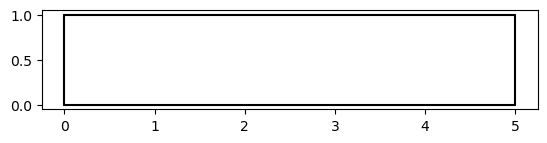

In [60]:
G = geometry.tensor_product(geometry.line_segment(0,1),
                            geometry.line_segment(0,5))
vis.plot_geo(G,2)
plt.axis('scaled');

In [84]:
x = np.array([1,2],'i')

In [90]:
isinstance(x[0],(np.int32,int))

True

In [74]:
int(dim)

2

In [3]:
np.array([[0,0],[1,0]])

array([[0, 0],
       [1, 0]])

In [47]:
kv2

KnotVector(array([0.25, 0.25, 0.25, 0.25, 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75]), 4)

In [36]:
def issub(kv1, kv2):
    a1,b1 = kv1.support()
    a2,b2 = kv2.support()
    n1, n2 = len(kv1.kv), len(kv2.kv)
    i1=0
    i2=0
    delta_p=kv2.p-kv1.p
    tol=1e-12
    if delta_p<0: return False
    if a1 > a2 + tol or b2 > b1 + tol: return False
    while kv1.kv[i1] < a2 - tol: 
        i1 += 1
        
    while i1 < n1 and i2 < n2:   
        while i2 < n2 and kv2.kv[i2] < kv1.kv[i1] - tol:
            i2 += 1
        if i2 == n2:
            break

        while i1 < n1 and kv1.kv[i1] < kv2.kv[i2] - tol:
            i1 += 1
        if i1 == n1:
            break

        m1 = 1
        while (i1 + m1) < n1 and abs(kv1.kv[i1 + m1] - kv1.kv[i1]) < tol:
            m1 += 1

        m2 = 1
        while (i2 + m2) < n2 and abs(kv2.kv[i2 + m2] - kv2.kv[i2]) < tol:
            m2 += 1
            

        if m2 < m1 + delta_p:
            print(2)
            return False

        i1 += m1
        i2 += m2
    return True

In [37]:
issub(kv1, kv2)

False

In [38]:
issub(kv2, kv1)

False

In [26]:
bspline.prolongation(kv1,kv2).toarray()

array([[1.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.75      , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.75      , 0.25      , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.125     , 0.79166667, 0.08333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.08333333, 0.83333333, 0.08333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.08333333, 0.83333333, 0.08333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ,

In [36]:
kv1 = bspline.make_knots(4,0,0.5,10**2, mult=2)
kv2 = bspline.make_knots(4,0,1,10**2, mult=2)
#kv1 = kv1.p_refine(1)

In [37]:
kv2 <= kv1

True

In [32]:
%timeit kv1 <= kv2

1.24 μs ± 4.33 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [33]:
%timeit kv1 < kv2

1.35 μs ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [34]:
%timeit kv1 > kv2

1.35 μs ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [35]:
%timeit kv1 >= kv2

1.45 μs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
